# FBRef

## Package installations

In [97]:
!python -m pip install --upgrade pip
!pip install pandas
!pip install soccerdata
!pip install numpy
!pip install scikit-learn
!pip install matplotlib

In [6]:
import os
import pandas as pd
import soccerdata as sd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

sd.FBref.available_leagues()

[08/26/23 22:07:45] INFO     No custom team name replacements found. You can configure these in       ]8;id=890831;file://c:\Users\lantz\OneDrive\Documents\GitHub\zen-analytics\venv\Lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=384315;file://c:\Users\lantz\OneDrive\Documents\GitHub\zen-analytics\venv\Lib\site-packages\soccerdata\_config.py#84\84]8;;\
                             C:\Users\lantz\soccerdata\config\teamname_replacements.json.                          

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=585209;file://c:\Users\lantz\OneDrive\Documents\GitHub\zen-analytics\venv\Lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=430945;file://c:\Users\lantz\OneDrive\Documents\GitHub\zen-analytics\venv\Lib\site-packages\soccerdata\_config.py#162\162]8;;\
                             C:\Users\lantz\soccerdata\config\league_dict.json.                                    

['Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

# English Premier League 2022-2023 season

In [7]:
# MUST RUN BEFORE CREATING NEW DATA FILE
fbref = sd.FBref(leagues="ENG-Premier League", seasons=['1819','1920','2021','2122','2223'])
print(fbref.__doc__)

[08/26/23 22:30:49] INFO     Saving cached data to C:\Users\lantz\soccerdata\data\FBref               ]8;id=793729;file://c:\Users\lantz\OneDrive\Documents\GitHub\zen-analytics\venv\Lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=932408;file://c:\Users\lantz\OneDrive\Documents\GitHub\zen-analytics\venv\Lib\site-packages\soccerdata\_common.py#89\89]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

c:\Users\lantz\OneDrive\Documents\GitHub\zen-analytics\venv\Lib\site-packages\soccerdata\_common.py:471: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


## Fetch and clean data

In [17]:
### Get data
stats_pd = fbref.read_player_season_stats(stat_type='standard')

### Convert data types
cols = list(stats_pd.columns)
for col in cols:
    if col in [('nation', ''),('pos', ''),('born', '')]:
        stats_pd[col] = stats_pd[col].astype(str)
    else:
        stats_pd[col] = stats_pd[col].apply(pd.to_numeric)
# print("Data types:")
# print(stats_pd.info())

print("\n***** Print data *****")
stats_pd.head()

print("\n***** Print data - stats only *****")
stats_pd_data = stats_pd.drop(columns=[('nation', ''),('pos', ''),('born', '')])
stats_pd_data.fillna(value=0, inplace=True)
stats_pd_data.head()


***** Print data *****

***** Print data - stats only *****


age Playing Time  \
                                                                       MP   
league             season team    player                                    
ENG-Premier League 1819   Arsenal Aaron Ramsey            27           28   
                                  Ainsley Maitland-Niles  20           16   
                                  Alex Iwobi              22           35   
                                  Alexandre Lacazette     27           35   
                                  Bernd Leno              26           32   

                                                                             \
                                                         Starts   Min   90s   
league             season team    player                                      
ENG-Premier League 1819   Arsenal Aaron Ramsey               14  1331  14.8   
                                  Ainsley Maitland-Niles     11   987  11.0   
                                  Alex Iwobi                 22  1970  21.9   
                                  Alexandre Lacazette        27  2502  27.8   
                                  Bernd Leno                 31  2836  31.5   

                                                         Performance          \
                                                                 Gls Ast G+A   
league             season team    player                                       
ENG-Premier League 1819   Arsenal Aaron Ramsey                     4   6  10   
                                  Ainsley Maitland-Niles           1   1   2   
                                  Alex Iwobi                       3   6   9   
                                  Alexandre Lacazette             13   8  21   
                                  Bernd Leno                       0   0   0   

                                                                  ...  \
                                                         G-PK PK  ...   
league             season team    player                          ...   
ENG-Premier League 1819   Arsenal Aaron Ramsey              4  0  ...   
                                  Ainsley Maitland-Niles    1  0  ...   
                                  Alex Iwobi                3  0  ...   
                                  Alexandre Lacazette      13  0  ...   
                                  Bernd Leno                0  0  ...   

                                                         Per 90 Minutes        \
                                                                    Gls   Ast   
league             season team    player                                        
ENG-Premier League 1819   Arsenal Aaron Ramsey                     0.27  0.41   
                                  Ainsley Maitland-Niles           0.09  0.09   
                                  Alex Iwobi                       0.14  0.27   
                                  Alexandre Lacazette              0.47  0.29   
                                  Bernd Leno                       0.00  0.00   

                                                                             \
                                                           G+A  G-PK G+A-PK   
league             season team    player                                      
ENG-Premier League 1819   Arsenal Aaron Ramsey            0.68  0.27   0.68   
                                  Ainsley Maitland-Niles  0.18  0.09   0.18   
                                  Alex Iwobi              0.41  0.14   0.41   
                                  Alexandre Lacazette     0.76  0.47   0.76   
                                  Bernd Leno              0.00  0.00   0.00   

                                                                             \
                                                            xG   xAG xG+xAG   
league             season team    player                                      
ENG-Premier League 1819   Arsenal Aaron Ramsey            0.23

## Data Analysis

In [29]:
stats_pd_data = stats_pd.drop(columns=[('nation', ''),('pos', ''),('born', '')])
stats_pd_data.head()

age Playing Time  \
                                                                       MP   
league             season team    player                                    
ENG-Premier League 1819   Arsenal Aaron Ramsey            27           28   
                                  Ainsley Maitland-Niles  20           16   
                                  Alex Iwobi              22           35   
                                  Alexandre Lacazette     27           35   
                                  Bernd Leno              26           32   

                                                                             \
                                                         Starts   Min   90s   
league             season team    player                                      
ENG-Premier League 1819   Arsenal Aaron Ramsey               14  1331  14.8   
                                  Ainsley Maitland-Niles     11   987  11.0   
                                  Alex Iwobi                 22  1970  21.9   
                                  Alexandre Lacazette        27  2502  27.8   
                                  Bernd Leno                 31  2836  31.5   

                                                         Performance          \
                                                                 Gls Ast G+A   
league             season team    player                                       
ENG-Premier League 1819   Arsenal Aaron Ramsey                     4   6  10   
                                  Ainsley Maitland-Niles           1   1   2   
                                  Alex Iwobi                       3   6   9   
                                  Alexandre Lacazette             13   8  21   
                                  Bernd Leno                       0   0   0   

                                                                  ...  \
                                                         G-PK PK  ...   
league             season team    player                          ...   
ENG-Premier League 1819   Arsenal Aaron Ramsey              4  0  ...   
                                  Ainsley Maitland-Niles    1  0  ...   
                                  Alex Iwobi                3  0  ...   
                                  Alexandre Lacazette      13  0  ...   
                                  Bernd Leno                0  0  ...   

                                                         Per 90 Minutes        \
                                                                    Gls   Ast   
league             season team    player                                        
ENG-Premier League 1819   Arsenal Aaron Ramsey                     0.27  0.41   
                                  Ainsley Maitland-Niles           0.09  0.09   
                                  Alex Iwobi                       0.14  0.27   
                                  Alexandre Lacazette              0.47  0.29   
                                  Bernd Leno                       0.00  0.00   

                                                                             \
                                                           G+A  G-PK G+A-PK   
league             season team    player                                      
ENG-Premier League 1819   Arsenal Aaron Ramsey            0.68  0.27   0.68   
                                  Ainsley Maitland-Niles  0.18  0.09   0.18   
                                  Alex Iwobi              0.41  0.14   0.41   
                                  Alexandre Lacazette     0.76  0.47   0.76   
                                  Bernd Leno              0.00  0.00   0.00   

                                                                             \
                                                            xG   xAG xG+xAG   
league             season team    player                                      
ENG-Premier League 1819   Arsenal Aaron Ramsey            0.23

In [30]:
len(stats_pd_data)

2677

### Get statistical overview of all player stats

In [31]:
stats_pd_data.describe()

age Playing Time                                         \
                             MP       Starts          Min          90s   
count  2677.000000  2677.000000  2677.000000  2677.000000  2677.000000   
mean     25.521106    19.916698    15.614494  1402.814718    15.586291   
std       4.315217    11.770228    11.932768  1036.947125    11.521911   
min      15.000000     1.000000     0.000000     1.000000     0.000000   
25%      22.000000     9.000000     4.000000   445.000000     4.900000   
50%      25.000000    21.000000    14.000000  1284.000000    14.300000   
75%      29.000000    30.000000    26.000000  2253.000000    25.000000   
max      39.000000    38.000000    38.000000  3420.000000    38.000000   

       Performance                                                      ...  \
               Gls          Ast          G+A         G-PK           PK  ...   
count  2677.000000  2677.000000  2677.000000  2677.000000  2677.000000  ...   
mean      1.906612     1.345162     3.251774     1.751214     0.155398  ...   
std       3.472541     2.134585     5.000535     3.109265     0.722103  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       1.000000     0.000000     1.000000     1.000000     0.000000  ...   
75%       2.000000     2.000000     4.000000     2.000000     0.000000  ...   
max      36.000000    20.000000    44.000000    29.000000    10.000000  ...   

      Per 90 Minutes                                                      \
                 Gls          Ast          G+A         G-PK       G+A-PK   
count    2677.000000  2677.000000  2677.000000  2677.000000  2677.000000   
mean        0.105992     0.086843     0.192761     0.099369     0.186130   
std         0.177114     0.426770     0.472419     0.168326     0.468222   
min         0.000000     0.000000     0.000000     0.000000     0.000000   
25%         0.000000     0.000000     0.000000     0.000000     0.000000   
50%         0.030000     0.000000     0.090000     0.030000     0.090000   
75%         0.140000     0.120000     0.280000     0.130000     0.270000   
max         2.030000    18.000000    18.000000     2.030000    18.000000   

                                                                        
                xG          xAG       xG+xAG         npxG     npxG+xAG  
count  2668.000000  2668.000000  2668.000000  2668.000000  2668.000000  
mean      0.131855     0.088137     0.219963     0.125056     0.213201  
std       0.207641     0.258677     0.346287     0.201056     0.341304  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.020000     0.010000     0.050000     0.020000     0.050000  
50%       0.060000     0.060000     0.130000     0.060000     0.130000  
75%       0.170000     0.120000     0.310000     0.170000     0.300000  
max       4.500000     9.730000     9.730000     4.500000     9.730000  

[8 rows x 30 columns]

### Create data correlation matrix

In [37]:
matrix = stats_pd_data.corr()
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
                              age Playing Time                                \
                                            MP    Starts       Min       90s   
age                      1.000000     0.170172  0.190972  0.193253  0.193234   
Playing Time   MP        0.170172     1.000000  0.926151  0.938308  0.938319   
               Starts    0.190972     0.926151  1.000000  0.996353  0.996345   
               Min       0.193253     0.938308  0.996353  1.000000  0.999997   
               90s       0.193234     0.938319  0.996345  0.999997  1.000000   
Performance    Gls       0.039908     0.453496  0.412377  0.408504  0.408518   
               Ast       0.022698     0.497952  0.458633  0.455067  0.455094   
               G+A       0.037403     0.527485  0.482146  0.477934  0.477956   
               G-PK      0.027826     0.456849  0.409973  0.405714  0.405730   
               PK        0.072102     0.213710  0.217812  0.217525  0.217523   
               

### Get statistical overview of all player stats grouped by player

In [52]:
playerGroups = stats_pd_data.groupby('player')
playerGroups.describe()

age                                                       \
                                                                              
                 count       mean       std   min    25%   50%    75%   max   
player                                                                        
Aaron Connolly     3.0  20.000000  1.000000  19.0  19.50  20.0  20.50  21.0   
Aaron Cresswell    5.0  30.000000  1.581139  28.0  29.00  30.0  31.00  32.0   
Aaron Hickey       1.0  20.000000       NaN  20.0  20.00  20.0  20.00  20.0   
Aaron Lennon       3.0  32.333333  1.527525  31.0  31.50  32.0  33.00  34.0   
Aaron Mooy         2.0  27.500000  0.707107  27.0  27.25  27.5  27.75  28.0   
...                ...        ...       ...   ...    ...   ...    ...   ...   
Érik Lamela        3.0  27.000000  1.000000  26.0  26.50  27.0  27.50  28.0   
Étienne Capoue     2.0  30.500000  0.707107  30.0  30.25  30.5  30.75  31.0   
Ørjan Nyland       1.0  28.000000       NaN  28.0  28.00  28.0  28.00  28.0   
İlkay Gündoğan     5.0  29.000000  1.581139  27.0  28.00  29.0  30.00  31.0   
Łukasz Fabiański   5.0  35.000000  1.581139  33.0  34.00  35.0  36.00  37.0   

                 Playing Time             ... Per 90 Minutes                 \
                           MP             ...           npxG       npxG+xAG   
                        count       mean  ...            75%   max    count   
player                                    ...                                 
Aaron Connolly            3.0  15.000000  ...         0.3650  0.45      3.0   
Aaron Cresswell           5.0  29.200000  ...         0.0400  0.05      5.0   
Aaron Hickey              1.0  26.000000  ...         0.0200  0.02      1.0   
Aaron Lennon              3.0  20.000000  ...         0.0600  0.06      3.0   
Aaron Mooy                2.0  30.000000  ...         0.0950  0.10      2.0   
...                       ...        ...  ...            ...   ...      ...   
Érik Lamela               3.0  22.333333  ...         0.2650  0.31      3.0   
Étienne Capoue            2.0  31.500000  ...         0.0375  0.04      2.0   
Ørjan Nyland              1.0   7.000000  ...         0.0000  0.00      1.0   
İlkay Gündoğan            5.0  29.600000  ...         0.3300  0.44      5.0   
Łukasz Fabiański          5.0  34.200000  ...         0.0000  0.00      5.0   

                                                                         
                                                                         
                      mean       std   min     25%    50%     75%   max  
player                                                                   
Aaron Connolly    0.353333  0.113725  0.26  0.2900  0.320  0.4000  0.48  
Aaron Cresswell   0.150000  0.043012  0.09  0.1400  0.150  0.1600  0.21  
Aaron Hickey      0.040000       NaN  0.04  0.0400  0.040  0.0400  0.04  
Aaron Lennon      0.076667  0.041633  0.03  0.0600  0.090  0.1000  0.11  
Aaron Mooy        0.235000  0.077782  0.18  0.2075  0.235  0.2625  0.29  
...                    ...       ...   ...     ...    ...     ...   ...  
Érik Lamela       0.346667  0.117189  0.26  0.2800  0.300  0.3900  0.48  
Étienne Capoue    0.105000  0.049497  0.07  0.0875  0.105  0.1225  0.14  
Ørjan Nyland      0.000000       NaN  0.00  0.0000  0.000  0.0000  0.00  
İlkay Gündoğan    0.416000  0.173868  0.20  0.3500  0.380  0.4800  0.67  
Łukasz Fabiański  0.000000  0.000000  0.00  0.0000  0.000  0.0000  0.00  

[1156 rows x 240 columns]

### Get statistical overview of player goals grouped by player

In [53]:
playerGroups.describe()['Performance']['Gls']

,count,mean,std,min,25%,50%,75%,max
player,,,,,,,,
Aaron Connolly,3.0,1.666667,1.527525,0.0,1.00,2.0,2.50,3.0
Aaron Cresswell,5.0,1.000000,1.414214,0.0,0.00,0.0,2.00,3.0
Aaron Hickey,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
Aaron Lennon,3.0,1.000000,1.000000,0.0,0.50,1.0,1.50,2.0
Aaron Mooy,2.0,2.500000,0.707107,2.0,2.25,2.5,2.75,3.0
...,...,...,...,...,...,...,...,...
Érik Lamela,3.0,2.333333,1.527525,1.0,1.50,2.0,3.00,4.0
Étienne Capoue,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0
Ørjan Nyland,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0


## Data Visualization

### Bar chart - average number of player goals grouped by player

In [90]:
# top_25 = playerGroups.mean()['Performance']['Gls'].sort_values(ascending=False).head(25)
# top_25

#This next line makes our charts show up in the notebook
%matplotlib inline
top = playerGroups.mean().sort_values(by=[('Performance','Gls')], ascending=False).head(15)
top[('Performance','Gls')]

player
Erling Haaland               36.000000
Harry Kane                   21.000000
Mohamed Salah                21.000000
Sadio Mané                   16.750000
Ivan Toney                   16.000000
Eden Hazard                  16.000000
Jamie Vardy                  14.800000
Son Heung-min                14.600000
Sergio Agüero                13.666667
Ollie Watkins                13.333333
Raheem Sterling              13.200000
Callum Wilson                12.000000
Marcus Rashford              11.800000
Pierre-Emerick Aubameyang    11.800000
Teemu Pukki                  11.000000
Name: (Performance, Gls), dtype: float64

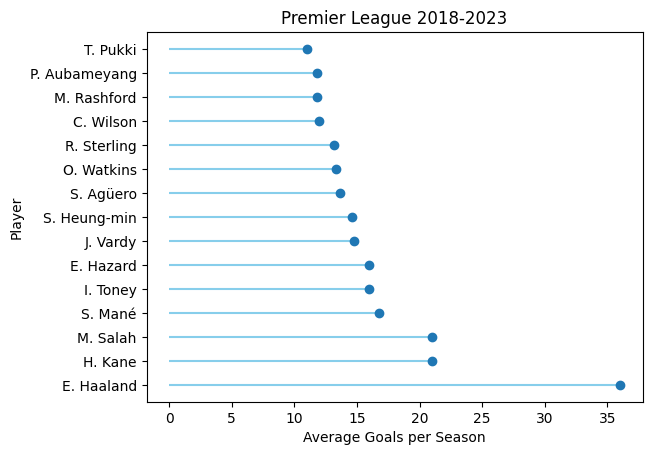

In [83]:
# # Vertical bar chart
# plt.bar(x=np.arange(1,26),height=top['Performance']['Gls'])

# Horizontal bar chart
plt.hlines(y=np.arange(1,16),xmin=0,xmax=top['Performance']['Gls'],color="skyblue")
plt.plot(top['Performance']['Gls'], np.arange(1,16), "o")


#Give it a title
plt.title("Premier League 2018-2023")

#Argument one is the position for each label
#Argument two is the label values and the final one is to rotate our labels
players = ()
for i in range(0,len(top.index)):
    name_split = top.index[i].split(" ")
    name = name_split[0][0]+". "+name_split[1]
    players = players + (name,)

# Give the x axis some labels across the tick marks.
plt.yticks(np.arange(1,16), players, rotation=0)
# Give the x and y axes a title - horizontal bar
plt.ylabel("Player")
plt.xlabel("Average Goals per Season")

#Finally, show me our new plot
plt.show()

### Scatter Plot - Average Goal Contributions vs. Expected Goal Contributions per Season

In [94]:
top_ga = playerGroups.mean().sort_values(by=[('Performance', 'G+A')], ascending=False).head(15)
top_ga[[('Expected', 'npxG+xAG'),('Performance', 'G+A')]]

,Expected,Performance
,npxG+xAG,G+A
player,,
Erling Haaland,28.400000,44.000000
Eden Hazard,17.400000,31.000000
Mohamed Salah,25.300000,30.600000
Harry Kane,20.340000,27.400000
Son Heung-min,16.580000,22.400000
Sadio Mané,20.750000,21.000000
Ivan Toney,15.800000,20.500000
Kevin De Bruyne,16.620000,20.200000


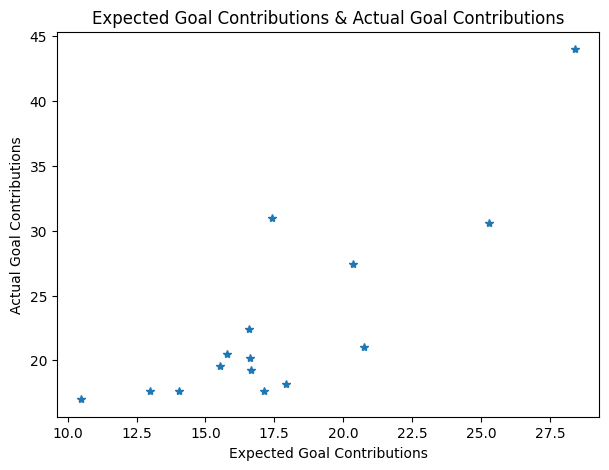

In [88]:
#Create plot area
fig, ax = plt.subplots()

#Set plot size
fig.set_size_inches(7, 5)

#Plot chart as above, but change the plot type from 'o' to '*' - givng us stars!
plt.plot(top_ga['Expected']['npxG+xAG'],top_ga['Performance']['G+A'],"*")

#Add labels to chart area
ax.set_title("Expected Goal Contributions & Actual Goal Contributions")
ax.set_ylabel("Actual Goal Contributions")
ax.set_xlabel("Expected Goal Contributions")

#Display the chart
plt.show()

## Data Model

### Create training and test datasets

In [59]:
# Transform data columns to arrays
expected_ga = stats_pd_data['Expected']['npxG+xAG'].to_numpy()
actual_ga = stats_pd_data['Performance']['G+A'].to_numpy()

# Split the data into training/testing sets
expected_ga_train = expected_ga[:-20].reshape(-1, 1)
expected_ga_test = expected_ga[-20:].reshape(-1, 1)

# Split the targets into training/testing sets
actual_ga_train = actual_ga[:-20]
actual_ga_test = actual_ga[-20:]

### Linear Regression

Coefficients:  [1.10893517]
Mean squared error: 2.79
Coefficient of determination: -0.19


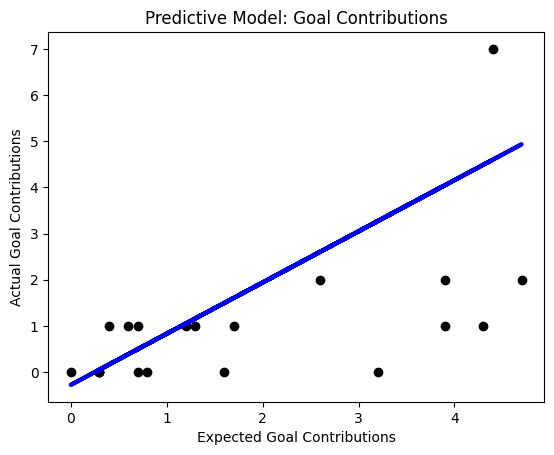

In [60]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
reg = linear_model.LinearRegression()

# Train the model using the training sets
reg.fit(expected_ga_train,actual_ga_train)

# Make predictions using the testing set
actual_ga_pred = reg.predict(expected_ga_test)

# The coefficients
print("Coefficients: ", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(actual_ga_test, actual_ga_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(actual_ga_test, actual_ga_pred))

#Create plot area
fig, ax = plt.subplots()

ax.set_title("Predictive Model: Goal Contributions")
ax.set_ylabel("Actual Goal Contributions")
ax.set_xlabel("Expected Goal Contributions")

# Plot outputs
plt.scatter(expected_ga_test, actual_ga_test, color="black")
plt.plot(expected_ga_test, actual_ga_pred, color="blue", linewidth=3)

plt.show()

### Representational Similarity Analysis (RSA)

In [1]:
!pip install rsatoolbox

     ---------------------------------------- 0.0/227.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/227.0 kB ? eta -:--:--
     ------ ------------------------------ 41.0/227.0 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 227.0/227.0 kB 2.3 MB/s eta 0:00:00
  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/08/c0/8085c5fd2f7f7514a0c5031b666171d5828ac5b3c9cf5d0ecd19688d5407/scikit_image-0.21.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for h5py from https://files.pythonhosted.org/packages/d1/93/0f4cf5058095d749d464e4f770d2bf339930e5f3374331f0d2fa6ddfbf28/h5py-3.9.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     -

(<Figure size 200x200 with 1 Axes>,
 array([[<Axes: >]], dtype=object),
 defaultdict(dict,
             {<Axes: >: {'image': <matplotlib.image.AxesImage at 0x1d944a2cfd0>}}))

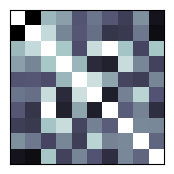

In [3]:
import numpy as np
import rsatoolbox
data = rsatoolbox.data.Dataset(np.random.rand(10, 5))
rdms = rsatoolbox.rdm.calc_rdm(data)
rsatoolbox.vis.show_rdm(rdms)